In [77]:
from google.colab import drive  #Menuliskan perintah link ke gdrive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [78]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import norm, boxcox
from scipy import stats

In [79]:
data = pd.read_csv('gdrive/My Drive/Latihan data/mall_customers.csv') # membaca file dari gdrive
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [80]:
#lihat summary data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Kesimpulan dari summary data :**

1. Customers berada di rentan usia 18 - 70 tahun dengan rata rata usia 39 tahun

2. Pendapatan customers berada diantara 15 - 137 dengan rata rata pendapatan 60

3. Pengeluaran customer rata rata score 50 dari total pendapatan 

In [81]:
#cek missing value
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [82]:
#cek duplikat data
data.duplicated().sum()

0

Tidak terdapat **missing value** dan **duplikat data** dalam file

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


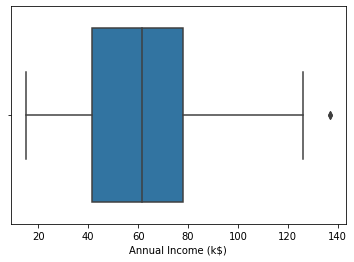

In [83]:
#cek outlier pada data annual income
sns.boxplot(data['Annual Income (k$)'])

In [84]:
# Cek nilai outlier
print(np.where(data['Annual Income (k$)']>130))

(array([198, 199]),)


In [85]:
#hapus data outlier (array([196, 197]),)
# IQR
Q1 = np.percentile(data['Annual Income (k$)'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Annual Income (k$)'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['Annual Income (k$)'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['Annual Income (k$)'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (200, 5)
New Shape:  (198, 5)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


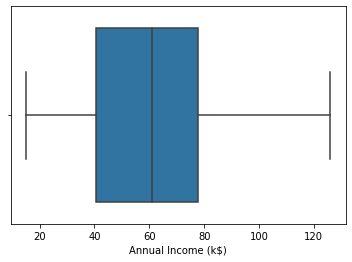

In [86]:
#cek kembali data annual income
sns.boxplot(data['Annual Income (k$)'])

**data annual income sudah bersih dari outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


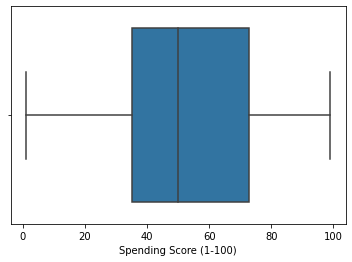

In [87]:
#cek outlier pada data spending score
sns.boxplot(data['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


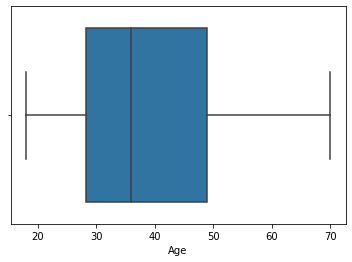

In [88]:
#cek outlier pada data spending score
sns.boxplot(data['Age'])

**data pada spending score dan age sudah bersih dari outlier**

**K MEANS CLUSTERING**

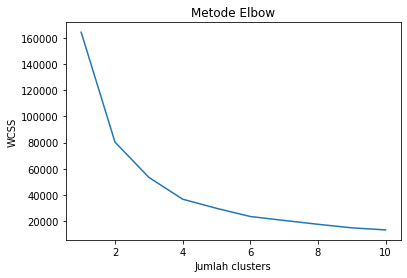

In [92]:
clus = data.iloc[:, [2, 3]].values
 
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(clus)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

Dari hasil diatas didapat data terbaik dibagi menjadi 5 cluster.

In [93]:
# training the k means algo
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(clus)

print(Y)

[2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3]


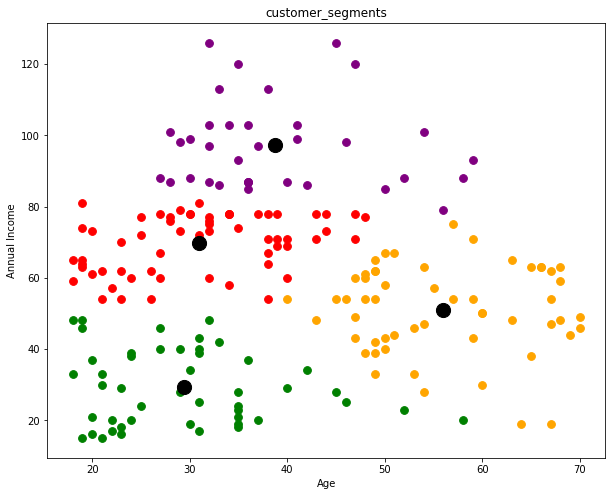

In [95]:
plt.figure(figsize=(10,8))
plt.scatter(clus[Y==0,0], clus[Y==0,1], s=60, c='orange', label='Cluster 1')
plt.scatter(clus[Y==1,0], clus[Y==1,1], s=60, c='red', label='Cluster 2')
plt.scatter(clus[Y==2,0], clus[Y==2,1], s=60, c='green', label='Cluster 3')
plt.scatter(clus[Y==3,0], clus[Y==3,1], s=60, c='purple', label='Cluster 4')


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black')

plt.title('customer_segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

Kesimpulan dari hasil clustering **Age** vs **annual income** :

- Cluster 1 Orange

mayoritas customer berusia 50 - 70 tahun dengan annual income pada 40 - 60

- Cluster 2 Red

mayoritas customer berusia 20 - 40 tahun dengan annual income pada 60 - 80

- Cluster 3 Green

mayoritas customer berusia 20 - 35 tahun dengan annual income pada 0 - 40

- Cluster 4 Purple

mayoritas customer berusia 30 - 45 tahun dengan annual income pada 85 - 100